# <div style="text-align: center; background-color: #ffd111; font-family:Franklin Gothic; color: white; padding: 15px; line-height:1.5;border-radius:15px">Netfilx Movies and TV Shows EDA and analysis🍿
</div>

# Introduction

![PopCorn](https://pixabay.com/get/g954f2fcbd961779b8d384ba069a790423e237f08165c48740ebff86e151089ed5acd49590ddb13316f9a0a9a656e45847d6d1c739b2b01eb7f444f53b85d4de8c4e112aa15767475bc7142765463059c_1280.jpg)
* Image from www.Pixabay.com by JillWellington

Hi Everyone, I am Jackie Yi! In this project, we will do Data Manipulation, EDA (Exploratory Data Analysis) using Data Visualization skills and then do data analysis on the data! Let's continue!

# 1.Library Installation

In [1]:
!pip install country_converter

#Data Analysis 
import pandas as pd
from pandas import Series
import numpy as np
import country_converter as coco
import re

#Data Vis
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

#Data Vis setting
%matplotlib inline
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for country_converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=9bcb720ce8e078e20b650973c4cc933c0bfe962a6dc6a069e4da9fdb0a284365
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country_converter


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# 2.Basic Data Manipulation

The dataset is not totally cleaned, I will do basic Data Manipulation in this section, and do more advanced Data Manipulation in other sections if needed.

In [2]:
df = pd.read_csv("../input/netflix-tv-shows-and-movies/titles.csv")
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [3]:
df.drop(columns={"description","imdb_id","id"},inplace=True)

Remove unnecessary columns from the dataset.

Text(0.5, 1.0, 'Missing Values Matrix')

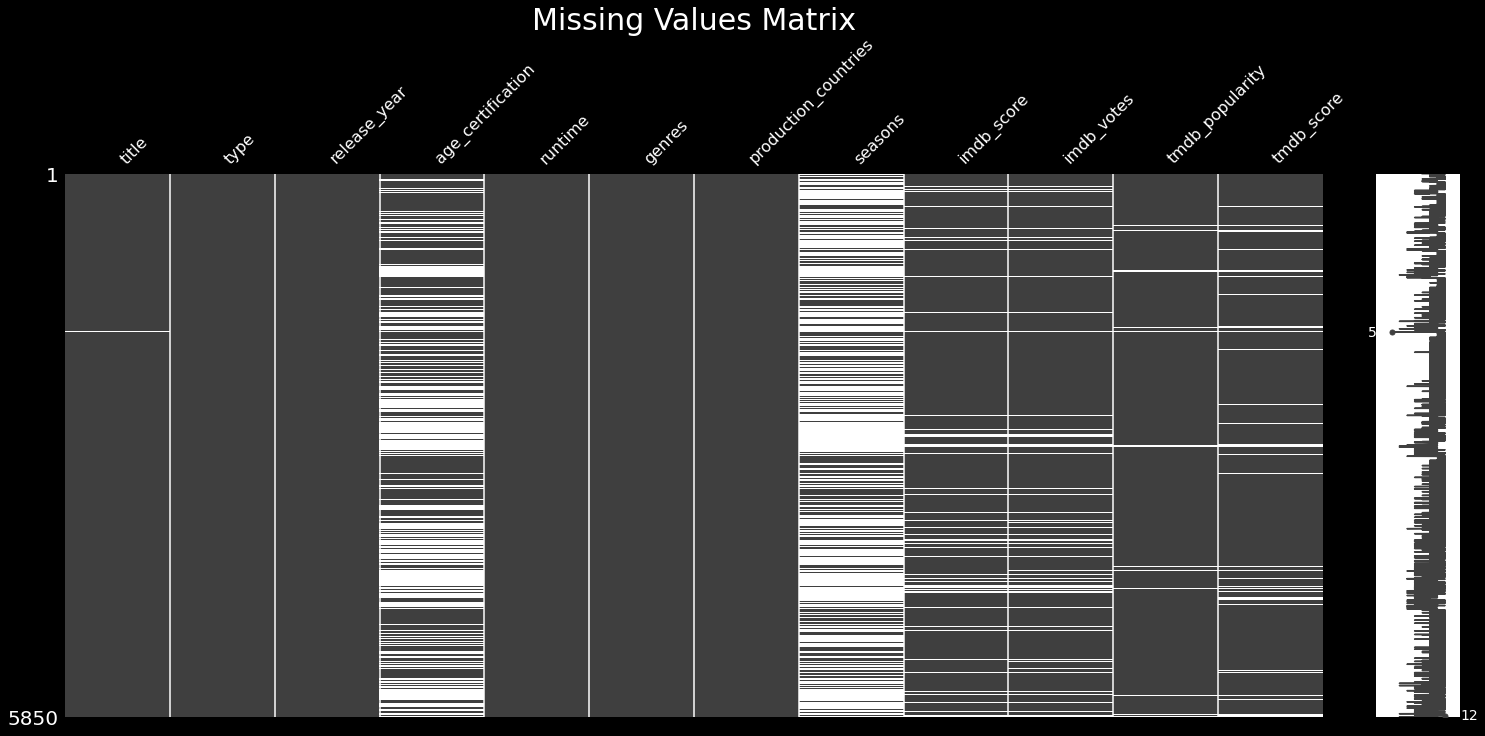

In [4]:
msno.matrix(df)
plt.title("Missing Values Matrix",fontsize=30)

We can see that most of our missing values are from age_certification and seasons columns.

In [5]:
df = df[~df["title"].isnull()]

The NaN in title is not recognizable, and there is only one item without a title. So I decide to directly remove it.

In [6]:
print(df["age_certification"].unique())
df["age_certification"].fillna("Not Rated",inplace=True)

['TV-MA' 'R' 'PG' nan 'TV-14' 'PG-13' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7' 'G'
 'NC-17']


I checked the unique catagories in age_certification column and matched them with Netfilx age rating list, I found that the dataset include all of the age rating, and the missing values are those movies or shows that haven't been rated on the website that the data came from.

In [7]:
df[df["seasons"].isnull()]["type"].value_counts()

MOVIE    3743
Name: type, dtype: int64

In [8]:
df["type"].value_counts()

MOVIE    3743
SHOW     2106
Name: type, dtype: int64

I found that all of the missing values in seasons columns are actually movies, it is reasonable that movies don't have any season. Instead of keep them as NaN or drop all of them, I decided to fill them with 0.

In [9]:
df["seasons"].fillna(0,inplace=True)

In [10]:
four_col = df[["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]]
df[["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]] = four_col.apply(lambda x : x.fillna(np.mean(x)))

Filling the NaN values from above columns using their own average values.

In [11]:
df.isnull().sum()

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

There is not missing value in the dataset now.

# 3.Univariate  Analysis

There are two types of columns in the dataset, 
1. Categorical columns
2. Numerical columns.

In this section, we will explore each column and get valuable insights from them using data visualization. I will use plotly, a powerful and high-efficient package for data visualization.

## 3.1 Categorical columns

### 3.1.1 Type

Task:
1. What is the distribution of type?

In [12]:
type_count = df["type"].value_counts()

type_fig = px.pie(values=type_count.values,names=type_count.index,color_discrete_sequence=px.colors.qualitative.T10,template="plotly_dark",title="Type distribution")
type_fig.update_traces(textinfo='label+percent+value')
type_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
type_fig.show()

In this dataset, 36% data is Show and 64% data is Movie

### 3.1.2 Age certification

Task:
1. What are the top 10 frequent age certification?

In [13]:
age_count = df["age_certification"].value_counts()[:10]
age_fig = px.bar(y=age_count.values,x=age_count.index,text=age_count.values,title="Top 10 Age certification count",color=age_count.index,color_discrete_sequence=px.colors.qualitative.T10,template="plotly_dark")
age_fig.update_layout(xaxis_title="Age certification",yaxis_title="Count")
age_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
age_fig.show()

The most frequent age certification is Not Rated, which has 2618 results, the second one is TV-MA, which is the TV Parental Guidelines signifies content for mature audiences, has 883 results. 

### 3.1.3 Genres

Task:
1. What are the top 10 frequent genre?

In [14]:
df["genres"]

0                                 ['documentation']
1                                ['drama', 'crime']
2       ['drama', 'action', 'thriller', 'european']
3                   ['fantasy', 'action', 'comedy']
4                                 ['war', 'action']
                           ...                     
5845                           ['romance', 'drama']
5846                                      ['drama']
5847                                     ['comedy']
5848                                             []
5849              ['family', 'animation', 'comedy']
Name: genres, Length: 5849, dtype: object

We can see there are some shows or movies have more than one genre, counting each genre combination as a new catagory might not be a good decision, so I would like to split them into single genres and count them.

In [15]:
genreslist = list()
df.genres.str.findall(r"'(\w+?)'").map(lambda x: genreslist.extend(x))
top_10_genres = pd.Series(genreslist).value_counts()[:10]

In [16]:
genres_fig = px.bar(y=top_10_genres.values,x=top_10_genres.index,text=top_10_genres,title="Top 10 Genres",color=top_10_genres.index,color_discrete_sequence=px.colors.qualitative.T10,template="plotly_dark")
genres_fig.update_layout(xaxis_title="Genre",yaxis_title="Count")
genres_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
genres_fig.show()

### 3.1.4 Production Countries

I used the same counting method for the production_countries columns. When I was processing the data, I found and solved two problems:
1. There is a category called Lebanon, which is inconsistent with the other 2 digits country codes, so I replaced it with LB.
2. There are 2 country codes that can not be found: SU and XX. I dropped their data in case of failure to visualize the world map below.

In [17]:
country_list = list()
df.production_countries.str.findall(r"'(\w+?)'").map(lambda x: country_list.extend(x))

country_list = pd.Series(country_list).replace("Lebanon","LB")
country_list = country_list.value_counts()
country_list = country_list.drop(index=["SU","XX"])

In [18]:
country_list.index = coco.convert(names=country_list.index, to="ISO3") 

I converted all of the valid two digits counrty codes to ISO3 format.

In [19]:
fig = px.choropleth(locations=country_list.index,
                    color=country_list.values,
                    color_discrete_sequence=px.colors.qualitative.T10,
                    template='plotly_dark',
                    title = 'Production Countries Distribution Map')
fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
fig.show()

As the world map shows above, it obvious to find that the United States has the darkest color, which means, for this dataset,  the United States produces the most of shows and movies.

## 3.2.Numeric Columns Analysis

### 3.2.1 Release Year

In [20]:
# year_df = [df[df["type"]=="MOVIE"]["release_year"],df[df["type"]=="SHOW"]["release_year"]]
year_df = df.groupby("type")["release_year"].apply(list)
Year_label = ["Type: Movie","Type: Show"]
color = ["yellow","red"]

year_fig = ff.create_distplot(year_df,Year_label,colors=color,show_hist=False)
year_fig.layout.template = "plotly_dark"
year_fig.update_layout(title="Runtime Distribution",font=dict(size = 13,family="Franklin Gothic"))
year_fig.update_layout(xaxis_title="Runtime",yaxis_title="Density")
year_fig.show()

#Dr.Xiao:Might use groupby

Most of the shows in the dataset relased around the second half of 2019, and most of the movies released around the first half of 2019.

### 3.2.2 Seasons : Show

In [21]:
seasons_fig = px.box(y=df[df["type"]=="SHOW"]["seasons"],template= 'plotly_dark', title = 'Shows Season Analysis(Boxplot)')
seasons_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))

In [22]:
df[df['seasons']==42]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
91,Survivor,SHOW,2000,TV-PG,48,['reality'],['US'],42.0,7.4,24687.0,54.19,7.4


I would like to analyze the season for shows because movies don't have actual season value, even though I assigned them value of 0.

The boxplot shows that most of shows only have 1 season, but there is one show have 42 seasons, which is a show called  Survivor.

### 3.2.3 Runtime

In [23]:
runtime_df = df.groupby("type")["runtime"].apply(list)

runtime_label = ["Type: Movie","Type: Show"]
color = ["yellow","red"]

runtime_fig = ff.create_distplot(runtime_df,runtime_label,colors=color,show_hist=False)
runtime_fig.layout.template = "plotly_dark"
runtime_fig.update_layout(font = dict(size = 15,family="Franklin Gothic"))
runtime_fig.update_layout(title="Runtime Distribution" ,xaxis_title="Runtime",yaxis_title="Density")
runtime_fig.show()

For movies, the most common runtime is around 96 mins. For shows, the most common runtime is around 45 mins.

# 4.Age Certification Analysis

From this section, I will use different combinations of features to do the analysis and come up with more in-depth insights

Task:

1. What is the average runtime of each type by age certification?


In [24]:
mean_movie_runtime = df.groupby(["type","age_certification"])["runtime"].agg(np.mean).round(0).sort_values(ascending=False)

In [25]:
runtime_age_fig = go.Figure(data=
[go.Bar(name="Movie",x=mean_movie_runtime["MOVIE"].index,y=mean_movie_runtime["MOVIE"].values,text=mean_movie_runtime["MOVIE"].values),
go.Bar(name="Show",x=mean_movie_runtime["SHOW"].index,y=mean_movie_runtime["SHOW"].values,text=mean_movie_runtime["SHOW"].values)])
runtime_age_fig.update_layout(title="Average runtime by type and age certification",xaxis_tickangle=45,xaxis_title="Age certification",yaxis_title="Average Runtime")
runtime_age_fig.layout.template = "plotly_dark"
runtime_age_fig.update_layout(font=dict(size = 15,family="Franklin Gothic"))
runtime_age_fig.show()

* For movies, the age certification of PG-13 has the highest average runtime of 107 mins, the age certification of G has the lowest average runtime of 89 mins.
* For shows, the age certification of TV-MA has the highest average runtime of 43 mins, the age certification of TV-Y has the lowest average runtime of 17 mins.

# 5.Genre Analysis

Task:
1. What is the most and least frequency genres of each type?


I will do Data Manipulation to make the dataframe avaliable for futher analysis

In [26]:
from functools import reduce
genresdummylist = df.genres.str.extractall(r"'(\w+)'").unstack()
dummylist = list()
for i in genresdummylist.columns:
    dummylist.append(pd.get_dummies(genresdummylist[i]))

dummy = reduce(lambda x, y: x.add(y, fill_value=0), dummylist).astype(int)
df = pd.merge(df, dummy, left_index=True, right_index=True)

In [27]:
type_genres_count = df[list(dummy.columns)].groupby(df['type']).sum()
type_genres_count

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
type,,,,,,,,,,,,,,,,,,,
MOVIE,718,282,1571,545,611,1876,344,351,315,145,261,191,9,698,204,113,825,103,28
SHOW,439,423,754,391,341,1092,99,331,315,109,117,71,225,273,385,57,403,60,13


In [28]:
type_genres_fig = go.Figure(data=
[go.Bar(name="Movie",x=type_genres_count.loc["MOVIE"].index,y=type_genres_count.loc["MOVIE"].values,text=type_genres_count.loc["MOVIE"].values),
go.Bar(name="Show",x=type_genres_count.loc["SHOW"].index,y=type_genres_count.loc["SHOW"].values,text=type_genres_count.loc["SHOW"].values)])
type_genres_fig.update_layout(title="Frequency of genres by type",xaxis_tickangle=45,xaxis_title="Genres",yaxis_title="Frequency")
type_genres_fig.layout.template = "plotly_dark"
type_genres_fig.update_layout(font=dict(size = 15,family="Franklin Gothic"))
type_genres_fig.update_layout(barmode="stack",xaxis_categoryorder="total descending")
type_genres_fig.show()

* The most frequency of genre for both movie and show is drama, there are 1092 shows and 1876 movies include the genre of drama. The least frequency one is western, only 13 and 28 movies include the genre of western.

# 6. Ends
Thanks for watching my data science project!